In this notebook we will perform the following task:
- Data Analysis
- Feature Engineering
- Model Building and Prediction using ML Techniques
- Model Building and Prediction using PyCaret(Auto ML) **bold text**



**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

**Importing Libraries for Outlier Detection**

In [ ]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

**Reading our Dataset**

In [ ]:
df= pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


**Data Analysis**

In [ ]:
df.shape

(34958, 31)

**Checking Null Values**

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

**Checking the distribution of Normal and Fraud cases in our Data Set**

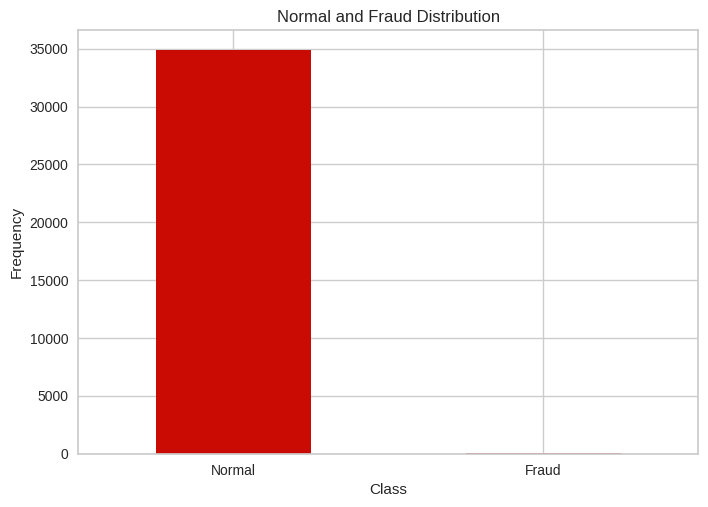

In [ ]:
fraud_check = pd.value_counts(df['Class'], sort=True)
labels = ['Normal', 'Fraud']
fraud_check.plot(kind='bar', rot=0, color='r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(range(2), labels)
plt.show()

**Let us see what is the shape of Normal and Fraud data set**

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(103, 31)

In [ ]:
normal_people.shape

(34854, 31)

**Finding out the avg amount in our both the data sets**

In [ ]:
fraud_people['Amount'].describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal_people['Amount'].describe()

count    34854.000000
mean        83.826802
std        228.111904
min          0.000000
25%          6.990000
50%         21.950000
75%         75.557500
max       7879.420000
Name: Amount, dtype: float64

**Let us analyse it visually**

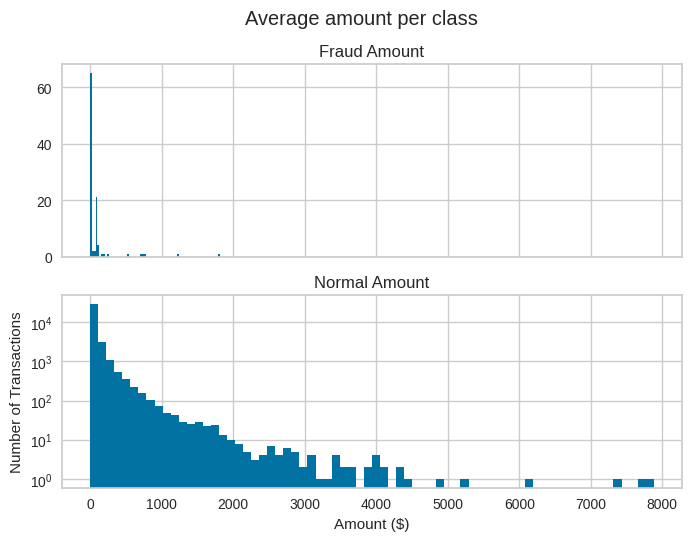

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

**Plotting a corr Heatmap**

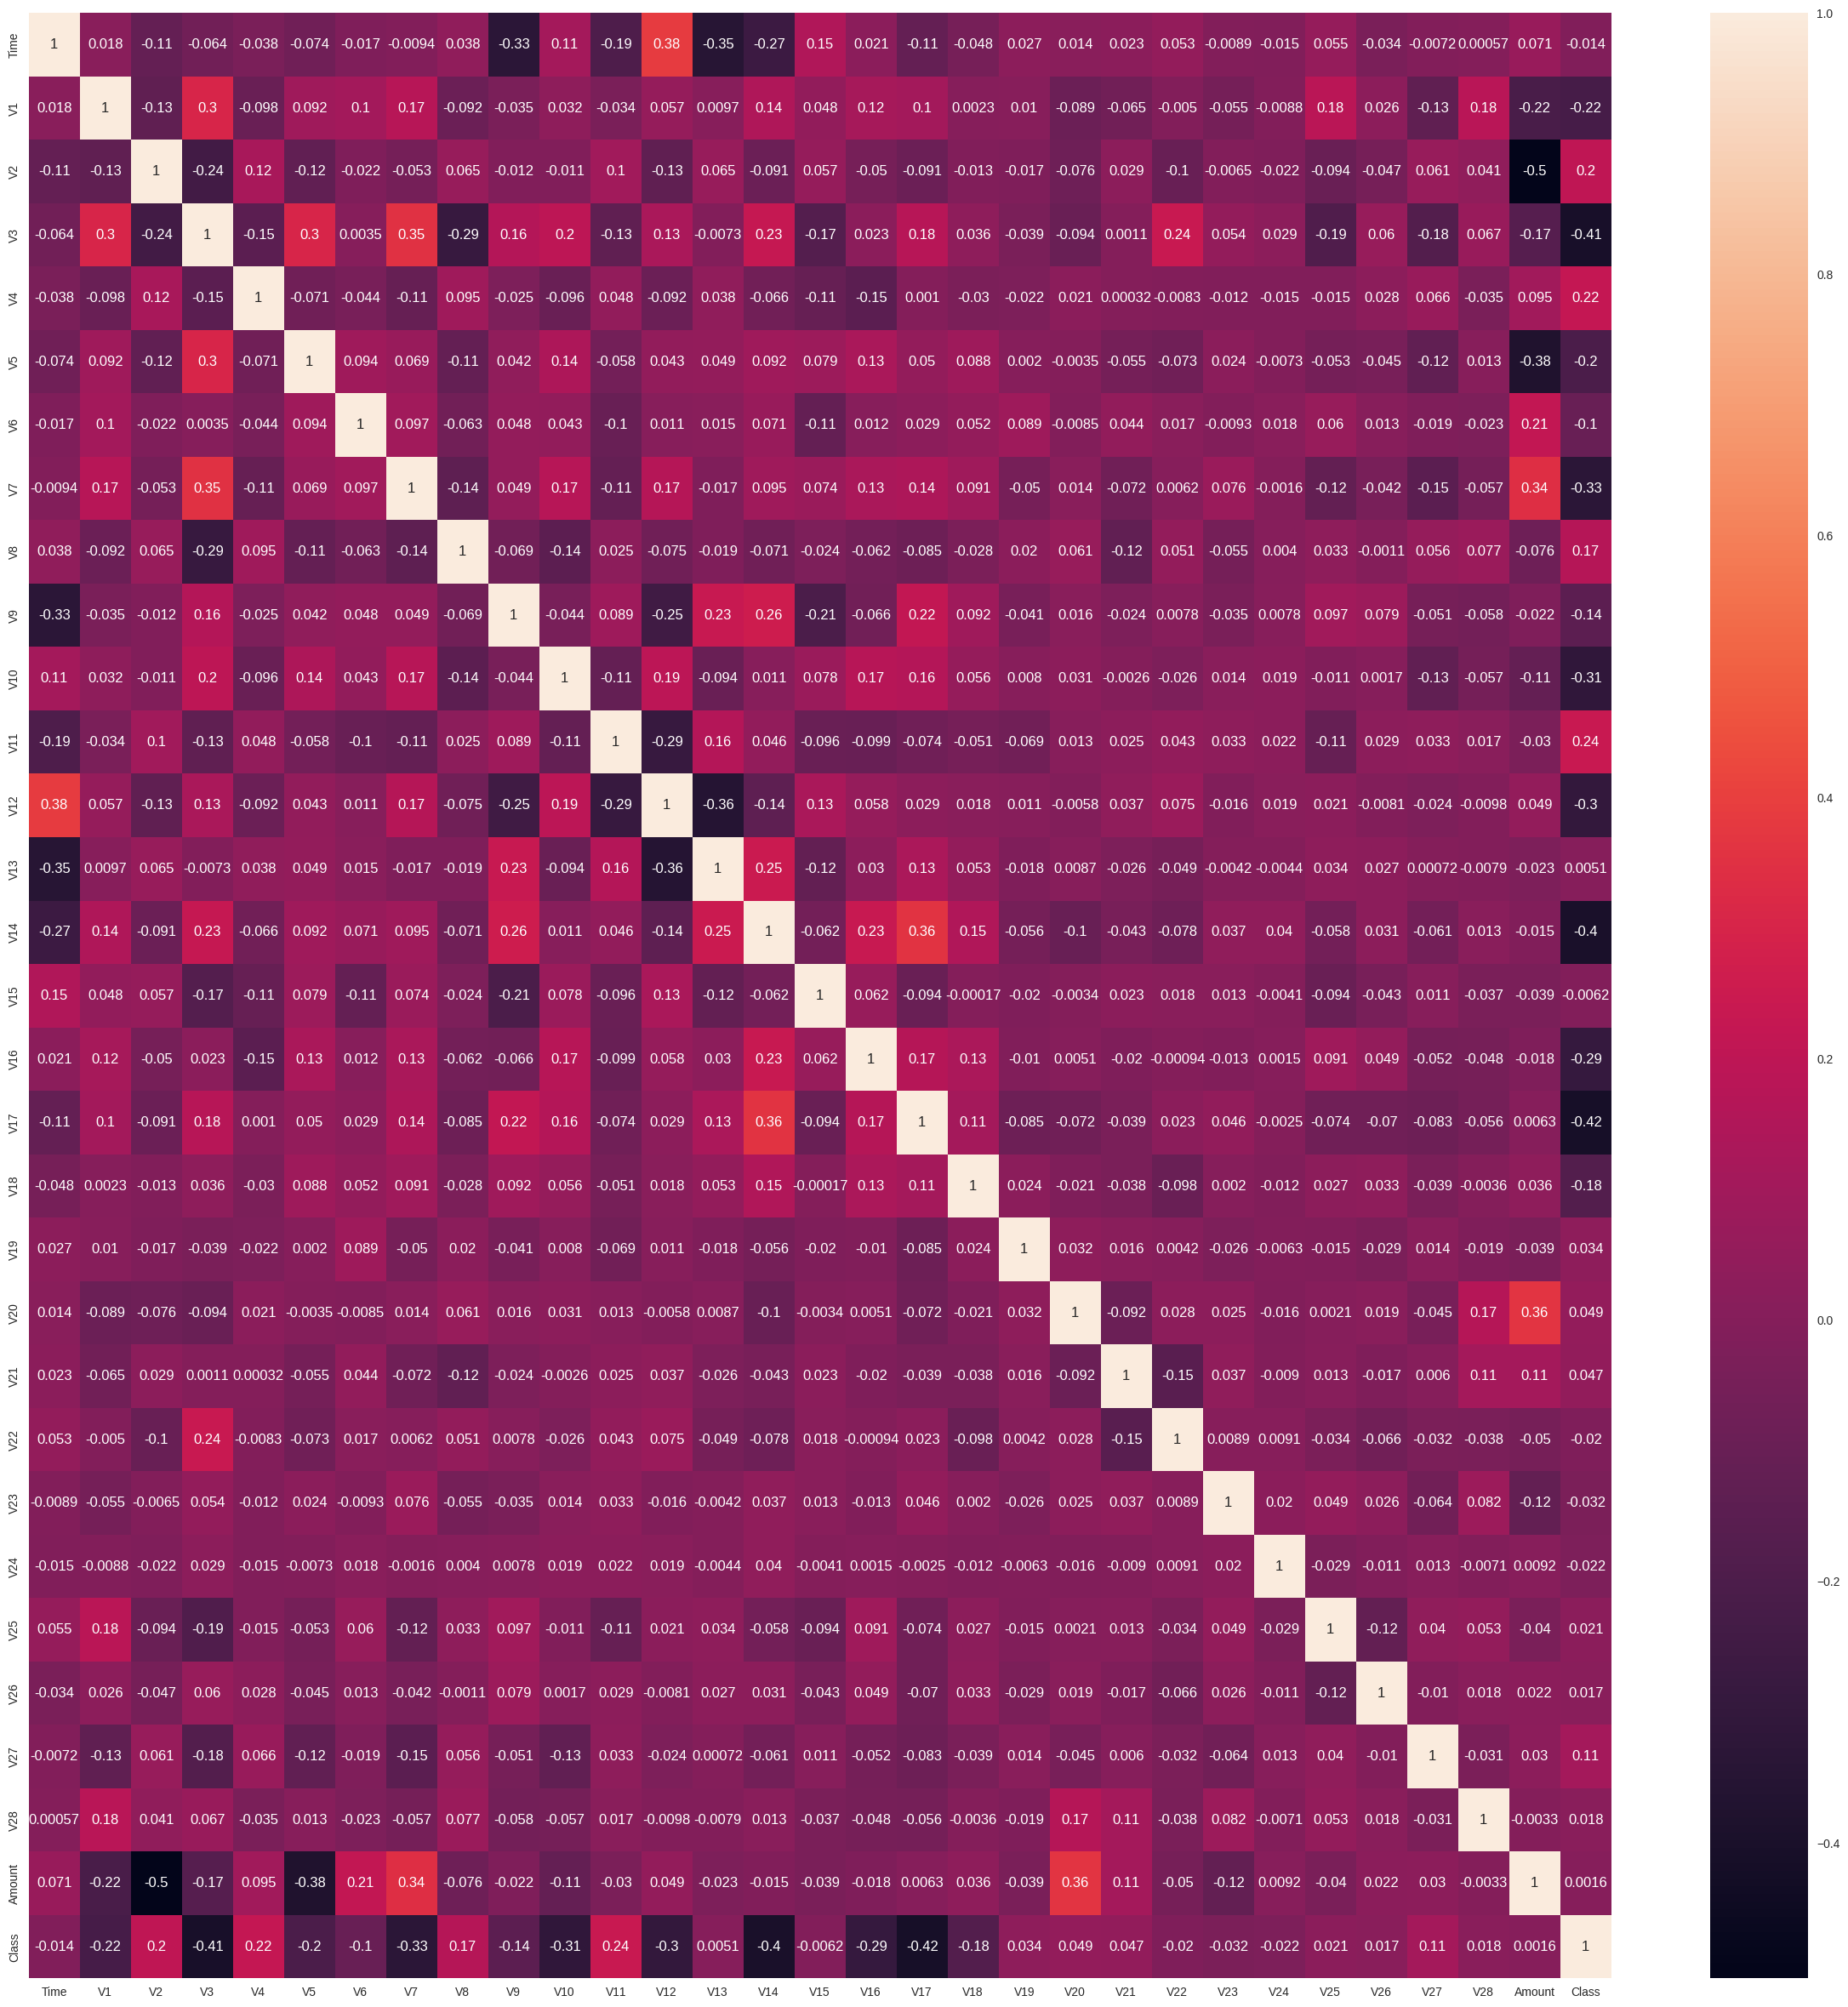

In [ ]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

**Plotting a corr Heatmap**

In [ ]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(34957, 30)

In [ ]:
y.shape

(34957,)

In [ ]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head() ## Dependent Variable

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

Model building

Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

We wil be using the following Models for our Anamoly Detection:
- Isolation Forest
- OneClassSVM

In [ ]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [ ]:
print(x_test,type(x_test))

        Time        V1        V2        V3        V4        V5        V6  \
6293    7433  0.522485 -1.131764 -1.452175  0.781320  1.881187  3.792453   
2554    2104 -3.396030  1.983326  0.540164 -1.113654 -1.976897 -0.722853   
31664  36459  1.094396 -0.054111  1.400575  1.274250 -0.999304  0.008038   
32910  37011  1.146269 -0.206295  1.258138  0.332462 -0.782052  0.559738   
10378  16676  1.158480  0.168947  0.536345  1.187908 -0.265547 -0.076325   
...      ...       ...       ...       ...       ...       ...       ...   
3328    2874  1.209219  0.437208  0.639071  1.179881 -0.425873 -1.055958   
31261  36289 -1.952367 -0.965999  0.179408 -0.358048 -0.082852 -1.394461   
27939  34776 -0.372806 -2.716696 -0.696879  0.580144 -1.242478 -0.395299   
11852  20363 -0.689421  0.484803  2.700309 -1.765830 -0.098027 -0.193920   
8356   11173 -0.968897  0.357420 -0.050278 -0.716749  2.074997  3.956261   

             V7        V8        V9  ...       V20       V21       V22  \
6293  -0.0208

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(bootstrap=False, contamination='auto', max_features=1.0,
                max_samples=24469, n_estimators=100, n_jobs=None,
                random_state=0, verbose=0, warm_start=False)

In [ ]:
print(x_test,type(x_test))

        Time        V1        V2        V3        V4        V5        V6  \
6293    7433  0.522485 -1.131764 -1.452175  0.781320  1.881187  3.792453   
2554    2104 -3.396030  1.983326  0.540164 -1.113654 -1.976897 -0.722853   
31664  36459  1.094396 -0.054111  1.400575  1.274250 -0.999304  0.008038   
32910  37011  1.146269 -0.206295  1.258138  0.332462 -0.782052  0.559738   
10378  16676  1.158480  0.168947  0.536345  1.187908 -0.265547 -0.076325   
...      ...       ...       ...       ...       ...       ...       ...   
3328    2874  1.209219  0.437208  0.639071  1.179881 -0.425873 -1.055958   
31261  36289 -1.952367 -0.965999  0.179408 -0.358048 -0.082852 -1.394461   
27939  34776 -0.372806 -2.716696 -0.696879  0.580144 -1.242478 -0.395299   
11852  20363 -0.689421  0.484803  2.700309 -1.765830 -0.098027 -0.193920   
8356   11173 -0.968897  0.357420 -0.050278 -0.716749  2.074997  3.956261   

             V7        V8        V9  ...       V20       V21       V22  \
6293  -0.0208

In [ ]:
ypred = iso_forest.predict(x_test)

In [ ]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

**Mapping the values as we want to have an output in 0 and 1**

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1

**Accuracy score and Matrix**

In [ ]:
print(accuracy_score(y_test,ypred))

0.9924675819984744


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     10455
         1.0       0.25      0.70      0.37        33

    accuracy                           0.99     10488
   macro avg       0.62      0.85      0.68     10488
weighted avg       1.00      0.99      0.99     10488



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[10386,    69],
       [   10,    23]])

**Printing how many errors our model have**

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 79 errors.


**OneClassSVM**

In [ ]:
svm= OneClassSVM(kernel='linear', degree=3, gamma=0.1,nu=0.05)

In [ ]:
svm.fit(x_train,y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='linear',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

In [ ]:
ypred1= svm.predict(x_test)

In [ ]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

** Accuracy score and Matrix**

In [ ]:
print(accuracy_score(y_test,ypred))

0.9924675819984744


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     10455
         1.0       0.25      0.70      0.37        33

    accuracy                           0.99     10488
   macro avg       0.62      0.85      0.68     10488
weighted avg       1.00      0.99      0.99     10488



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[10386,    69],
       [   10,    23]])

In [ ]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

SVM have 537 errors.


Solving the Problem Statement using PyCaret Library(Auto ML)

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

In [ ]:
!pip install pycaret

In [ ]:
df= pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
from pycaret.classification import *

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
model= setup(data= df, target = 'Class')

,Description,Value
0,Session id,2281
1,Target,Class
2,Target type,Binary
3,Original data shape,"(34957, 31)"
4,Transformed data shape,"(34957, 31)"
5,Transformed train set shape,"(24469, 31)"
6,Transformed test set shape,"(10488, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [409]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:34:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9990,0.8927,0.7857,0.8698,0.8156,0.8151,0.8211,0.5090
lr,Logistic Regression,0.9980,0.9426,0.5768,0.7326,0.6344,0.6335,0.6435,3.6300
ridge,Ridge Classifier,0.9978,0.0000,0.4804,0.6877,0.5529,0.5519,0.5671,0.1170
knn,K Neighbors Classifier,0.9971,0.6584,0.0143,0.1000,0.0250,0.0249,0.0378,1.3200
svm,SVM - Linear Kernel,0.9971,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2950
nb,Naive Bayes,0.9839,0.9797,0.8714,0.1437,0.2455,0.2417,0.3485,0.0750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9994,0.9799,0.8304,0.9565,0.8794,0.8791,0.8860,0.4000
ada,Ada Boost Classifier,0.9993,0.9827,0.8018,0.9764,0.8619,0.8616,0.8749,4.9210
et,Extra Trees Classifier,0.9993,0.9484,0.8018,0.9764,0.8685,0.8682,0.8784,1.0390
rf,Random Forest Classifier,0.9993,0.9558,0.7732,0.9764,0.8386,0.8383,0.8554,6.3150
lightgbm,Light Gradient Boosting Machine,0.9991,0.9392,0.8304,0.8633,0.8390,0.8386,0.8424,2.2770
dt,Decision Tree Classifier,0.9990,0.8927,0.7857,0.8698,0.8156,0.8151,0.8211,0.5090
gbc,Gradient Boosting Classifier,0.9986,0.9378,0.7446,0.7695,0.7478,0.7471,0.7517,23.6920
lda,Linear Discriminant Analysis,0.9984,0.9918,0.7607,0.7564,0.7410,0.7402,0.7489,0.1090
lr,Logistic Regression,0.9980,0.9426,0.5768,0.7326,0.6344,0.6335,0.6435,3.6300
ridge,Ridge Classifier,0.9978,0.0000,0.4804,0.6877,0.5529,0.5519,0.5671,0.1170


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [410]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9999,0.8571,1.0000,0.9231,0.9229,0.9256
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9980,0.9268,0.2857,1.0000,0.4444,0.4437,0.5340
3,0.9996,0.9267,0.8571,1.0000,0.9231,0.9229,0.9256
4,0.9992,0.9973,0.7143,1.0000,0.8333,0.8329,0.8448
5,0.9988,0.9266,0.5714,1.0000,0.7273,0.7267,0.7555
6,0.9988,0.7808,0.5714,1.0000,0.7273,0.7267,0.7555
7,0.9996,1.0000,1.0000,0.8889,0.9412,0.9410,0.9426
8,0.9996,1.0000,0.8750,1.0000,0.9333,0.9331,0.9352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

In [ ]:
random_forest

**We can Hypertune our model too**

In [ ]:
tuned_model= tune_model(random_forest)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:43:59
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Predictions**

In [ ]:
pred_holdout = predict_model(random_forest,data= x_test)

In [ ]:
pred_holdout